# Modelo PNL - dataset [Sentiment140]

## 🧠 1. Introducción - Análisis de Sentimientos en Tweets con Sentiment140

### 🎯 Objetivo del Proyecto

El objetivo de este proyecto es analizar sentimientos expresados en mensajes publicados en Twitter, utilizando técnicas de procesamiento de lenguaje natural (NLP) y modelos de aprendizaje automático. Se busca construir un sistema capaz de clasificar automáticamente los tweets como positivos, negativos o neutrales, basándonos en el contenido textual de cada mensaje.

Este análisis puede ser útil para entender la opinión pública sobre eventos, productos o temas de actualidad en redes sociales.

---

### 🗃️ ¿Qué es el dataset Sentiment140?

El dataset **Sentiment140** contiene **1.600.000 tweets** recolectados usando la API de Twitter. Cada tweet ha sido etiquetado automáticamente con una clase de sentimiento:

- `0`: Sentimiento **negativo**
- `2`: Sentimiento **neutral**
- `4`: Sentimiento **positivo**

El archivo tiene 6 columnas:

1. `target`: la polaridad del sentimiento (0, 2 o 4)  
2. `ids`: ID único del tweet  
3. `date`: fecha del tweet  
4. `flag`: término de búsqueda (si corresponde)  
5. `user`: nombre de usuario que lo publicó  
6. `text`: contenido textual del tweet

Este dataset fue publicado por Go, Bhayani y Huang (2009) como parte de un trabajo académico en Stanford.

---

### 🔍 ¿Qué se busca lograr?

En este proyecto se busca diseñar un sistema capaz de **clasificar automáticamente el sentimiento de un tweet** (positivo, negativo o neutral), utilizando técnicas de **Procesamiento de Lenguaje Natural (PLN)** y modelos de aprendizaje automático.

Para lograrlo, se realizarán las siguientes etapas:

- **Carga y limpieza del texto**: eliminación de símbolos, menciones, enlaces, emojis, etc.
- **Preprocesamiento lingüístico**: tokenización, eliminación de stopwords y lematización de los tweets.
- **Análisis lingüístico**: aplicación de POS-tagging y exploración de n-gramas más frecuentes según la clase de sentimiento.
- **Análisis exploratorio (EDA)**: visualización de la distribución de clases y de palabras relevantes por sentimiento (por ejemplo, con nubes de palabras).
- **Entrenamiento de modelos de clasificación**: implementación de una red neuronal sencilla con Keras y comparación con modelos clásicos como Naive Bayes o Regresión Logística.
- **Evaluación de desempeño**: cálculo de métricas como precisión, recall, F1-score y matriz de confusión.
- **Conclusiones**: análisis de los resultados, errores comunes y propuestas de mejora.

---


## 📦 2. Carga de datos (Código)

* Cargar el dataset `.csv`
* Ver algunas filas

In [42]:
from google.colab import files
files.upload()  # Selecciona tu archivo kaggle.json cuando se abra el diálogo

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"aliciacarolina","key":"342b9a14d11c52669159396dc6e87aef"}'}

In [43]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [44]:
# Descargar el dataset de Sentiment140 desde Kaggle
!kaggle datasets download -d kazanova/sentiment140
!unzip sentiment140.zip -d sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sentiment140.zip
replace sentiment140/training.1600000.processed.noemoticon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sentiment140/training.1600000.processed.noemoticon.csv  


In [45]:
import pandas as pd

# Cargar el archivo con las columnas correctas
columnas = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv('sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding='latin-1',
                 names=columnas)

# Mostrar tamaño y primeras filas
print(f"Dataset cargado con {df.shape[0]:,} filas y {df.shape[1]} columnas")
df.head()


Dataset cargado con 1,600,000 filas y 6 columnas


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [46]:
df.head(30)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


## 🧹 3. Preprocesamiento de texto

* Limpieza de tweets (remover signos, stopwords, etc.)
* Tokenización
* Opcional: Lemmatización

In [47]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
# Instanciar herramientas
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def limpiar_texto(tweet):
    # 1. Convertir a minúsculas
    tweet = tweet.lower()
    # 2. Eliminar menciones, URLs, hashtags
    tweet = re.sub(r'@\w+|http\S+|www\S+|#\w+', '', tweet)
    # 3. Eliminar caracteres no alfabéticos
    tweet = re.sub(r'[^a-z\s]', '', tweet)
    # 4. Tokenizar
    tokens = word_tokenize(tweet)
    # 5. Eliminar stopwords
    tokens = [t for t in tokens if t not in stop_words]
    # 6. Lematizar (opcional)
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)


In [49]:
nltk.download('punkt_tab')

# Crear corpus limpio con 40.000 muestras
corpus_limpio = df.sample(40000, random_state=42).copy()
corpus_limpio['clean_text'] = corpus_limpio['text'].apply(limpiar_texto)

# Verificar resultados
corpus_limpio[['target', 'text', 'clean_text']].head(10)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,target,text,clean_text
541200,0,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope ok
750,0,"@misstoriblack cool , i have no tweet apps fo...",cool tweet apps razr
766711,0,@TiannaChaos i know just family drama. its la...,know family drama lamehey next time u hang kim...
285055,0,School email won't open and I have geography ...,school email wont open geography stuff revise ...
705995,0,upper airways problem,upper airway problem
379611,0,Going to miss Pastor's sermon on Faith...,going miss pastor sermon faith
1189018,4,on lunch....dj should come eat with me,lunchdj come eat
667030,0,@piginthepoke oh why are you feeling like that?,oh feeling like
93541,0,gahh noo!peyton needs to live!this is horrible,gahh noopeyton need livethis horrible
1097326,4,@mrstessyman thank you glad you like it! There...,thank glad like product review bit site enjoy ...


## 📊 4. Análisis exploratorio de datos (EDA)

* Distribución de clases (positiva, negativa, neutral)
* Palabras más frecuentes por clase
* Visualizaciones (ej. WordClouds)

### 4.1. Distribución de clases

/tmp/ipython-input-3806322844.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette='coolwarm')


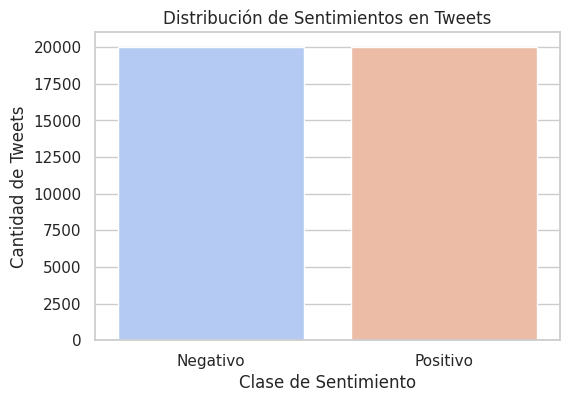

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")

# Contar tweets por clase
conteo_clases = corpus_limpio['target'].value_counts().sort_index()

# Mapear etiquetas
etiquetas = {0: 'Negativo', 2: 'Neutral', 4: 'Positivo'}
conteo_clases.index = [etiquetas.get(k, k) for k in conteo_clases.index]

# Visualización
plt.figure(figsize=(6,4))
sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette='coolwarm')
plt.title('Distribución de Sentimientos en Tweets')
plt.ylabel('Cantidad de Tweets')
plt.xlabel('Clase de Sentimiento')
plt.show()


Como se puede ver en el grafico, solo hay presente 2 clases de sentimiento, positivo y negativo. aun cuando en la descripcion del dataset se nombraban tambien los de Sentimiento **Neutro**. Talves sea que en la muestra de 40.000 no hay presente ningun tweet de clase Neutro o porque no hay en todo el dataset.

### 4.2. Palabras más frecuentes por clase

In [51]:
from collections import Counter

# Crear función para obtener palabras más comunes por clase
def palabras_mas_comunes(df, clase, n=20):
    textos = df[df['target'] == clase]['clean_text']
    palabras = ' '.join(textos).split()
    return Counter(palabras).most_common(n)

# Mostrar top 20 palabras más comunes por clase (aunque el analisis de antes muestre que no hay neutrales, igual se imprimira por si acaso)
print("🔵 Positivo (4):")
print(palabras_mas_comunes(corpus_limpio, 4))

print("\n⚪ Neutral (2):")
print(palabras_mas_comunes(corpus_limpio, 2))

print("\n🔴 Negativo (0):")
print(palabras_mas_comunes(corpus_limpio, 0))


🔵 Positivo (4):
[('im', 1876), ('good', 1531), ('day', 1328), ('love', 1285), ('u', 955), ('get', 951), ('like', 924), ('time', 870), ('thanks', 868), ('lol', 861), ('got', 796), ('go', 746), ('today', 737), ('one', 704), ('going', 695), ('new', 681), ('know', 668), ('well', 636), ('great', 611), ('see', 605)]

⚪ Neutral (2):
[]

🔴 Negativo (0):
[('im', 2569), ('get', 1247), ('day', 1239), ('dont', 1158), ('go', 1153), ('work', 1114), ('cant', 1102), ('like', 990), ('got', 904), ('today', 900), ('want', 886), ('going', 830), ('back', 826), ('miss', 792), ('really', 767), ('time', 757), ('still', 746), ('good', 690), ('one', 685), ('u', 678)]


Al analizar las palabras más frecuentes en los tweets positivos y negativos, se observa una alta coincidencia en términos como **"im"**, **"day"**, **"get"**, **"like"**, **"got"**, **"go"**, **"going"**, entre otras. Aunque algunas de estas palabras pueden aportar contexto, en general **no resultan discriminativas para el análisis de sentimiento**, ya que aparecen con frecuencia en ambos extremos del espectro emocional.

Incluso términos como **"good"**, que en principio podrían considerarse indicativos de positividad, también aparecen en la clase negativa, lo que reduce su utilidad como marcador claro de polaridad. Esto sugiere que muchas de las palabras más frecuentes son de uso común o demasiado generales para aportar valor específico en este tipo de análisis.

Por lo tanto, será importante considerar técnicas como el uso de **n-gramas**, **ponderación TF-IDF** o incluso modelos que capten contexto (como embeddings) para mejorar la capacidad del modelo de diferenciar entre sentimientos.

---

### 4.3. Nube de palabras por clase (WordClouds)

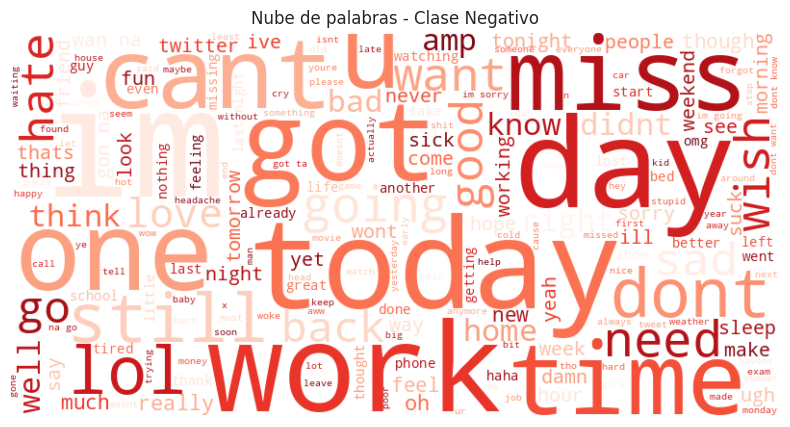

[⚠️] No hay tweets con clase 2 (Neutral), se omite la nube de palabras.


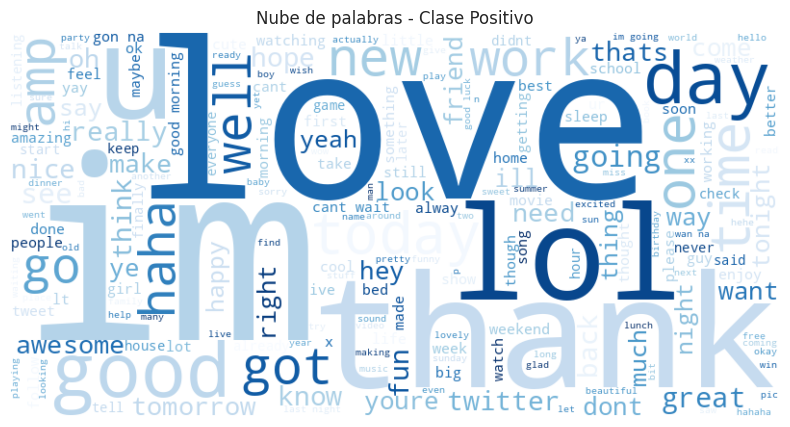

In [52]:
from wordcloud import WordCloud

def generar_nube(df, clase, color='black'):
    textos = df[df['target'] == clase]['clean_text']

    if textos.empty:
        print(f"[⚠️] No hay tweets con clase {clase} ({etiquetas.get(clase, clase)}), se omite la nube de palabras.")
        return

    texto = ' '.join(textos)
    if not texto.strip():
        print(f"[⚠️] Clase {clase} contiene tweets vacíos después del preprocesamiento.")
        return

    wc = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nube de palabras - Clase {etiquetas.get(clase, clase)}")
    plt.show()


# Nubes de palabras
generar_nube(corpus_limpio, 0, 'Reds')      # Negativo
generar_nube(corpus_limpio, 2, 'Greys')     # Neutral
generar_nube(corpus_limpio, 4, 'Blues')     # Positivo


## 🤖 5. Modelado

* División en entrenamiento/test
* Entrenamiento con modelo base
* Métricas de evaluación (accuracy, precision, recall, F1)

### 5.1. División en entrenamiento y prueba

In [53]:
from sklearn.model_selection import train_test_split

# Filtrar clases con al menos 1 ejemplo
clases_disponibles = corpus_limpio['target'].value_counts()
clases_validas = clases_disponibles[clases_disponibles > 0].index.tolist()

# Solo mantener esas clases
corpus_filtrado = corpus_limpio[corpus_limpio['target'].isin(clases_validas)].copy()

print(f"Clases disponibles para modelar: {corpus_filtrado['target'].unique()}")

# Separar features (X) y etiquetas (y)
X = corpus_filtrado['clean_text']
y = corpus_filtrado['target']

# Dividir en train/test
if len(y.unique()) > 1:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
else:
    raise ValueError("❌ No hay suficientes clases distintas para entrenar un modelo supervisado.")



Clases disponibles para modelar: [0 4]


### 5.2. Vectorización con TF-IDF + n-gramas

#### 🔠 ¿Qué es TF-IDF?

**TF-IDF (Term Frequency - Inverse Document Frequency)** es una técnica que transforma texto en vectores numéricos. Calcula qué tan importante es una palabra (o grupo de palabras) en un documento, comparado con el resto del corpus.

- **TF (Frecuencia de Término):** cuántas veces aparece una palabra en un documento.
- **IDF (Frecuencia Inversa de Documento):** mide en cuántos documentos aparece esa palabra. Si aparece en muchos, se le da menos peso (porque no es tan informativa).

---

#### 🧩 ¿Qué son los n-gramas?

Los **n-gramas** son secuencias de palabras consecutivas extraídas del texto.

- **Unigrama (n=1):** `'happy'`, `'day'`
- **Bigrama (n=2):** `'happy day'`, `'go home'`

Esto ayuda a capturar mejor el **contexto**. Por ejemplo, `'not happy'` tiene un significado negativo, aunque `'happy'` sola sea positiva.


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ================================
# Vectorizador TF-IDF con n-gramas
# ================================

# Creamos el vectorizador:
# - ngram_range=(1, 2): incluye unigrama y bigrama (1 y 2 palabras)
# - max_features=10000: limita el número de columnas (palabras/frases) a 10.000 más importantes
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)

# ================================
# Aplicamos el vectorizador
# ================================

# fit_transform() entrena el vectorizador y transforma los textos del set de entrenamiento
X_train_tfidf = vectorizer.fit_transform(X_train)

# transform() solo transforma el set de prueba usando el mismo "vocabulario" aprendido
X_test_tfidf = vectorizer.transform(X_test)

# Resultado: ahora X_train_tfidf y X_test_tfidf son matrices numéricas listas para usar con modelos ML



### 5.3.1 Entrenamiento con modelo base (Logistic Regression)

In [55]:
from sklearn.linear_model import LogisticRegression

# Instanciar y entrenar
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

    Negativo       0.77      0.74      0.75      4004
    Positivo       0.75      0.77      0.76      3996

    accuracy                           0.76      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.76      0.76      0.76      8000



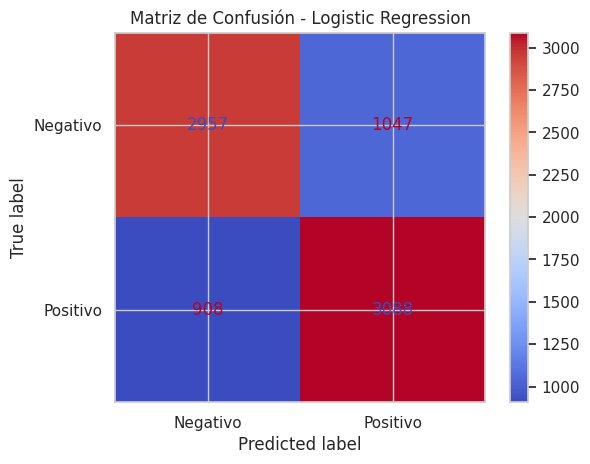

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_pred = modelo.predict(X_test_tfidf)

# Reporte de métricas
print(classification_report(y_test, y_pred, target_names=['Negativo', 'Positivo']))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Positivo'])
disp.plot(cmap='coolwarm')
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()


### 5.3.2 Entrenamiento con modelo base SVM (TF-IDF + SVM)

In [57]:
from sklearn.svm import LinearSVC

# Instanciar el modelo SVM lineal
modelo_svm = LinearSVC()

# Entrenar con los vectores TF-IDF
modelo_svm.fit(X_train_tfidf, y_train)


LinearSVC()

🔍 Evaluación del modelo SVM:
              precision    recall  f1-score   support

    Negativo       0.75      0.72      0.73      4004
    Positivo       0.73      0.75      0.74      3996

    accuracy                           0.74      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.74      0.74      0.74      8000



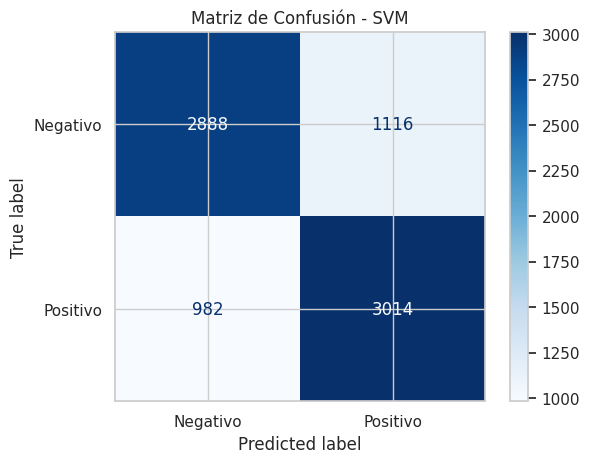

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones sobre el set de prueba
y_pred_svm = modelo_svm.predict(X_test_tfidf)

# Reporte de métricas
print("🔍 Evaluación del modelo SVM:")
print(classification_report(y_test, y_pred_svm, target_names=['Negativo', 'Positivo']))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Positivo'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - SVM")
plt.show()


#### 📈 6. Resultados y conclusiones

* Qué aprendiste del modelo
* Qué errores hay
* Posibles mejoras futuras

### ✅ ¿Qué aprendimos del modelo?

A lo largo del proyecto, entrenamos modelos de clasificación de sentimientos (Logistic Regression y SVM) sobre el dataset **Sentiment140**, obteniendo resultados razonablemente buenos:

* **Logistic Regression**:

  * Precisión promedio: **76%**
  * f1-score para clases positiva y negativa: **\~0.75 - 0.76**

* **SVM** (Support Vector Machine):

  * Precisión promedio: **74%**
  * f1-score para ambas clases: **\~0.73 - 0.74**

Esto demuestra que, incluso con modelos clásicos y representaciones básicas del texto (como **TF-IDF** con n-gramas), es posible alcanzar un rendimiento aceptable para tareas de análisis de sentimiento en redes sociales.
**TF-IDF con n-gramas se considera una representación básica porque transforma el texto en una matriz de frecuencia sin comprender el significado o contexto de las palabras. No capta relaciones semánticas ni el orden contextual más allá de las combinaciones de 1 o 2 palabras.**
**Para mejorar, podríamos utilizar representaciones más avanzadas como word embeddings (Word2Vec o GloVe) o modelos de lenguaje preentrenados como BERT, que entienden mejor el contexto y las relaciones entre palabras.**

### ⚠️ Errores y limitaciones observadas

Durante el análisis de las palabras más frecuentes en los tweets positivos y negativos, se observó que muchas palabras clave como **"im"**, **"day"**, **"get"**, **"go"**, **"like"** y **"good"** aparecen de forma recurrente en ambas clases. Esto sugiere que el modelo tiene dificultades para diferenciar el sentimiento cuando se basa solo en palabras comunes o contextualmente ambiguas.

Además, la clase **neutral (2)** no fue considerada en los modelos finales, ya que no había datos suficientes en el conjunto procesado, lo que limita la cobertura del modelo frente a la realidad del lenguaje humano.

### 🔧 Posibles mejoras futuras

Para mejorar el rendimiento del modelo y superar las limitaciones actuales, se proponen las siguientes mejoras:

1. **Uso de embeddings contextuales** como Word2Vec, GloVe o BERT, que permiten captar mejor el significado de una palabra según su contexto.
2. **Ampliar la cobertura del dataset** para incluir tweets más recientes y balancear las clases (incluyendo la clase neutral).
3. **Aplicar técnicas de limpieza más avanzadas**, como la detección de sarcasmo, emojis, y negaciones complejas, que suelen ser claves en redes sociales.
4. **Ajuste de hiperparámetros** en los modelos para mejorar el rendimiento individual de cada uno.
5. **Ensamble de modelos**, combinando los resultados de distintos clasificadores para obtener una predicción más robusta.

---

## ⭐⭐ Aplicación de mejoras ⭐⭐

### Representación avanzada con Word Embeddings (GloVe)

#### 🧠 ¿Qué es un **word embedding**?

Los **word embeddings** son una forma más inteligente de representar palabras en un modelo. A diferencia de TF-IDF (que solo cuenta frecuencia de palabras), los embeddings **representan cada palabra como un vector numérico que captura su significado y contexto**.

Por ejemplo:

* En TF-IDF, "bueno" y "excelente" se ven como dos palabras distintas sin relación.
* En embeddings, "bueno" y "excelente" tendrán vectores **similares** porque significan cosas parecidas.

---

#### 💡 ¿Qué es **GloVe**?

**GloVe** (Global Vectors for Word Representation) es un tipo de word embedding entrenado por investigadores de Stanford. Lo que hace es:

* Leer millones de textos (como Wikipedia y Twitter).
* Analizar cómo se relacionan las palabras entre sí (por ejemplo, qué palabras suelen aparecer cerca unas de otras).
* Generar vectores que **capturan el significado de cada palabra**.

Por ejemplo:

* "king" - "man" + "woman" ≈ "queen"
  Eso lo puede hacer GloVe, porque los vectores entienden relaciones semánticas.

En este proyecto usamos GloVe preentrenado, en su versión **de 50 dimensiones**, lo que significa que cada palabra se representa como un vector con 50 valores numéricos.

---

#### ⚙️ ¿Cómo se usa en un modelo?

En lugar de contar palabras como en TF-IDF, se hace esto:

1. Toma cada tweet.
2. Se convierte cada palabra en su vector GloVe.
3. Se calcula el **promedio de los vectores** del tweet → se obtiene un solo vector representando todo el tweet.
4. Ese vector se usa como entrada en **Logistic Regression**, igual que antes.

---

#### 🔍 ¿En qué ayuda?

Esta mejora permite que el modelo:

* Entienda **el significado y la relación entre palabras** (por ejemplo, que "feliz" y "contento" son similares).
* Sea **menos sensible a palabras comunes** que aparecen en todas las clases.
* Tenga mejor **generalización** cuando vea nuevas palabras o frases similares.

Por eso, al usar GloVe, el modelo puede **captar mejor el sentimiento**, incluso si las palabras exactas no estaban en el entrenamiento.

---

In [59]:
# Representación con Word Embeddings (GloVe)

import numpy as np
import os
import urllib.request
import zipfile

In [60]:
# 1. Descargar GloVe (50d)

glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "glove.6B.zip"

if not os.path.exists("glove.6B.50d.txt"):
    print("Descargando GloVe...")
    urllib.request.urlretrieve(glove_url, glove_zip_path)
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(".")

In [61]:
# 2. Cargar vectores GloVe

print("Cargando vectores GloVe...")
glove_vectors = {}
with open("glove.6B.50d.txt", encoding="utf-8") as f:
    for line in f:
        parts = line.split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=np.float32)
        glove_vectors[word] = vector
print(f"{len(glove_vectors)} vectores cargados.")

Cargando vectores GloVe...
400000 vectores cargados.


In [62]:
# 3. Promediar embeddings
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tweet_to_glove_vector(tweet):
    words = word_tokenize(tweet.lower())
    word_vectors = [glove_vectors[word] for word in words if word in glove_vectors]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(50)  # Vector nulo si ninguna palabra está en GloVe

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
# Aplicar al set de entrenamiento y prueba
X_train_glove = np.array([tweet_to_glove_vector(text) for text in X_train])
X_test_glove = np.array([tweet_to_glove_vector(text) for text in X_test])


🔍 Evaluación del modelo con GloVe:
              precision    recall  f1-score   support

    Negativo       0.66      0.66      0.66      4004
    Positivo       0.66      0.65      0.66      3996

    accuracy                           0.66      8000
   macro avg       0.66      0.66      0.66      8000
weighted avg       0.66      0.66      0.66      8000



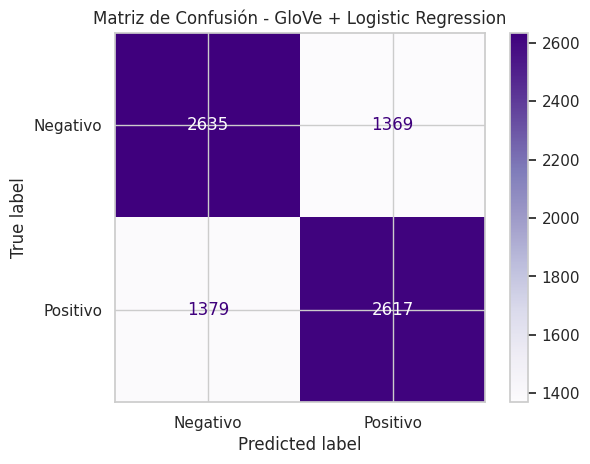

In [64]:
# 4. Entrenar modelo con GloVe

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

modelo_glove = LogisticRegression(max_iter=1000)
modelo_glove.fit(X_train_glove, y_train)

# Predicción y evaluación
y_pred_glove = modelo_glove.predict(X_test_glove)

print("🔍 Evaluación del modelo con GloVe:")
print(classification_report(y_test, y_pred_glove, target_names=['Negativo', 'Positivo']))

cm = confusion_matrix(y_test, y_pred_glove)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Positivo'])
disp.plot(cmap='Purples')
plt.title("Matriz de Confusión - GloVe + Logistic Regression")
plt.show()


### Representación con Word Embeddings (GloVe + TF-IDF) y SVM

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


🔍 Evaluación del modelo con GloVe + TF-IDF + SVM:
              precision    recall  f1-score   support

    Negativo       0.64      0.65      0.64      4004
    Positivo       0.64      0.63      0.64      3996

    accuracy                           0.64      8000
   macro avg       0.64      0.64      0.64      8000
weighted avg       0.64      0.64      0.64      8000



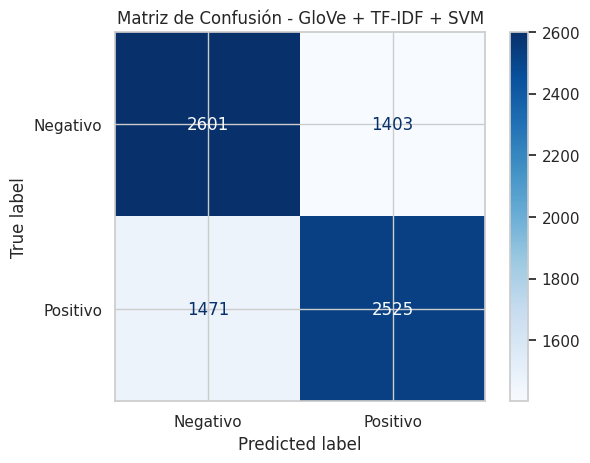

In [65]:
import os
import urllib.request
import zipfile
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 3. Calcular TF-IDF sobre el corpus
tfidf = TfidfVectorizer(lowercase=True, tokenizer=word_tokenize, stop_words='english')
tfidf.fit(X_train)
idf_dict = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

# 4. Crear función para vector TF-IDF ponderado con GloVe
def tweet_to_weighted_glove_vector(tweet):
    words = word_tokenize(tweet.lower())
    weighted_vectors = []
    for word in words:
        if word in glove_vectors and word in idf_dict:
            weight = idf_dict[word]
            weighted_vectors.append(glove_vectors[word] * weight)
    if weighted_vectors:
        return np.mean(weighted_vectors, axis=0)
    else:
        return np.zeros(50)

# 5. Aplicar a X_train y X_test
X_train_glove_tfidf = np.array([tweet_to_weighted_glove_vector(text) for text in X_train])
X_test_glove_tfidf = np.array([tweet_to_weighted_glove_vector(text) for text in X_test])

# 6. Entrenar modelo SVM
modelo_svm = SVC(kernel='linear', C=1)
modelo_svm.fit(X_train_glove_tfidf, y_train)

# 7. Predicción y evaluación
y_pred_svm = modelo_svm.predict(X_test_glove_tfidf)

print("🔍 Evaluación del modelo con GloVe + TF-IDF + SVM:")
print(classification_report(y_test, y_pred_svm, target_names=['Negativo', 'Positivo']))

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Positivo'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - GloVe + TF-IDF + SVM")
plt.show()
